https://ncses.nsf.gov/pubs/nsf22316

https://ncses.nsf.gov/data-collections/national-patterns/2021#data

https://www.aaas.org/programs/r-d-budget-and-policy/federal-rd-budget-dashboard


data for sector gdp:

https://www.bea.gov/itable/gdp-by-industry

for value added description in sector graphs:

https://aneconomicsense.org/2017/03/19/long-term-structural-change-in-the-us-economy-manufacturing-is-simply-following-the-path-of-agriculture/

for tfp:

https://www.johnfernald.net/TFP

The plot is smoothed using an HP filter with an annual smoothing parameter of 10.

# RD, fed and business

In [ ]:
# Install necessary libraries
# !pip install gspread pandas google-auth google-auth-oauthlib google-auth-httplib2

# Authorize and access the Google Sheet
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default

# Authenticate and create the PyDrive client.
auth.authenticate_user()
creds, _ = default()

gc = gspread.authorize(creds)

# Define the Google Sheet URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/18mKjfC3vGk0zXayKwHHyK82LTfbhBKhQuJtQYpgok60/edit#gid=592927751'
spreadsheet_id = spreadsheet_url.split('/')[5]

# Open the sheet and select the first worksheet
sheet = gc.open_by_key(spreadsheet_id)
worksheet = sheet.get_worksheet(0)  # Assumes you want the first sheet

# Read data into a pandas DataFrame
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])  # Assumes first row is the header
df = df.replace(',', '', regex=True).astype(float)
df.set_index('Year', inplace=True)
# Display the DataFrame
df.head()


,GDP,All_basic,Federal_basic,Nonfederal_basic,Business_basic,education_basic,NPOs_basic,All_applied,Federal_applied,Nonfederal_applied,Business_applied,education_applied,NPOs_applied,All_development,Federal_development,Nonfederal_development,Business_development,education_development,NPOs_development
Year,,,,,,,,,,,,,,,,,,,
1953.0,2695.6,3182.0,1835.0,45.0,1067.0,42.0,194.0,8928.0,5233.0,209.0,3155.0,193.0,139.0,23628.0,12204.0,20.0,11338.0,18.0,48.0
1954.0,2680.0,3490.0,1994.0,66.0,1160.0,58.0,213.0,9457.0,5387.0,216.0,3517.0,192.0,144.0,25626.0,13908.0,24.0,11619.0,21.0,55.0
1955.0,2871.2,3846.0,2146.0,94.0,1296.0,78.0,233.0,10133.0,5656.0,218.0,3931.0,183.0,145.0,27756.0,15863.0,26.0,11792.0,22.0,54.0
1956.0,2932.4,4683.0,2559.0,124.0,1635.0,101.0,264.0,12584.0,6692.0,216.0,5338.0,176.0,163.0,38200.0,23234.0,29.0,14858.0,23.0,55.0
1957.0,2994.1,5138.0,2852.0,157.0,1690.0,125.0,316.0,15243.0,8235.0,214.0,6427.0,171.0,196.0,42204.0,28282.0,33.0,13799.0,27.0,63.0


In [ ]:
df.columns

Index(['GDP', 'All_basic', 'Federal_basic', 'Nonfederal_basic',
       'Business_basic', 'education_basic', 'NPOs_basic', 'All_applied',
       'Federal_applied', 'Nonfederal_applied', 'Business_applied',
       'education_applied', 'NPOs_applied', 'All_development',
       'Federal_development', 'Nonfederal_development', 'Business_development',
       'education_development', 'NPOs_development'],
      dtype='object')

In [ ]:
df['GDP'] = df['GDP'] * 1000
relevant_columns = [col for col in df.columns if col not in ['Year', 'GDP']]
for col in relevant_columns:
    df[col + '_GDP'] = df[col]*100 / df['GDP']
df.head()

,GDP,All_basic,Federal_basic,Nonfederal_basic,Business_basic,education_basic,NPOs_basic,All_applied,Federal_applied,Nonfederal_applied,...,Nonfederal_applied_GDP,Business_applied_GDP,education_applied_GDP,NPOs_applied_GDP,All_development_GDP,Federal_development_GDP,Nonfederal_development_GDP,Business_development_GDP,education_development_GDP,NPOs_development_GDP
Year,,,,,,,,,,,,,,,,,,,,,
1953.0,2695600.0,3182.0,1835.0,45.0,1067.0,42.0,194.0,8928.0,5233.0,209.0,...,0.007753,0.117043,0.007160,0.005157,0.876540,0.452738,0.000742,0.420611,0.000668,0.001781
1954.0,2680000.0,3490.0,1994.0,66.0,1160.0,58.0,213.0,9457.0,5387.0,216.0,...,0.008060,0.131231,0.007164,0.005373,0.956194,0.518955,0.000896,0.433545,0.000784,0.002052
1955.0,2871200.0,3846.0,2146.0,94.0,1296.0,78.0,233.0,10133.0,5656.0,218.0,...,0.007593,0.136911,0.006374,0.005050,0.966704,0.552487,0.000906,0.410699,0.000766,0.001881
1956.0,2932400.0,4683.0,2559.0,124.0,1635.0,101.0,264.0,12584.0,6692.0,216.0,...,0.007366,0.182035,0.006002,0.005559,1.302687,0.792320,0.000989,0.506684,0.000784,0.001876
1957.0,2994100.0,5138.0,2852.0,157.0,1690.0,125.0,316.0,15243.0,8235.0,214.0,...,0.007147,0.214655,0.005711,0.006546,1.409572,0.944591,0.001102,0.460873,0.000902,0.002104


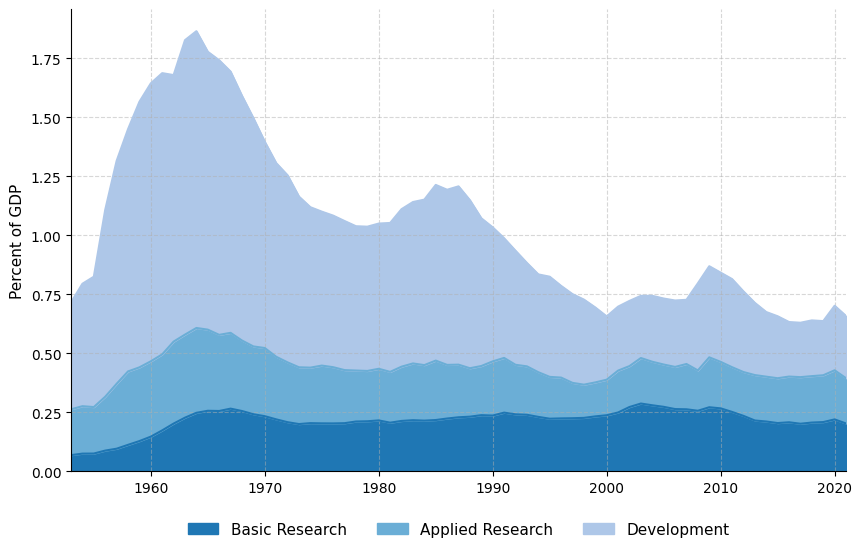

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Define colors for each series
colors = ['#1f77b4', '#6baed6', '#aec7e8']
# colors = ['#BB394F', '#DF576E', '#EA899A']
# Define custom labels for the legend
labels = ['Basic Research', 'Applied Research', 'Development']

# Plot the specified columns as a stacked area plot with custom colors
ax = df[['Federal_basic_GDP', 'Federal_applied_GDP', 'Federal_development_GDP']].plot(
    kind='area',
    stacked=True,
    figsize=(10, 6),
    alpha=1,
    color=colors
)

# Customize the plot
ax.set_xlabel('')
ax.set_ylabel('Percent of GDP', fontsize=11)

# Set custom labels for the legend on the collections (areas)
for collection, label in zip(ax.collections, labels):
    collection.set_label(label)

# Customize the legend
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, frameon=False, fontsize=11)

# Set grid to dashed with alpha=0.5
ax.grid(True, linestyle='--', alpha=0.5)

# Apply alpha to the lines
lines = ax.get_lines()
for line in lines:
    line.set_alpha(1)

# Remove the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis limits
ax.set_xlim(1953, 2021)
plt.savefig('federal_rd.png', dpi=300)
# Show the plot
plt.show()
from google.colab import files
files.download('federal_rd.png')

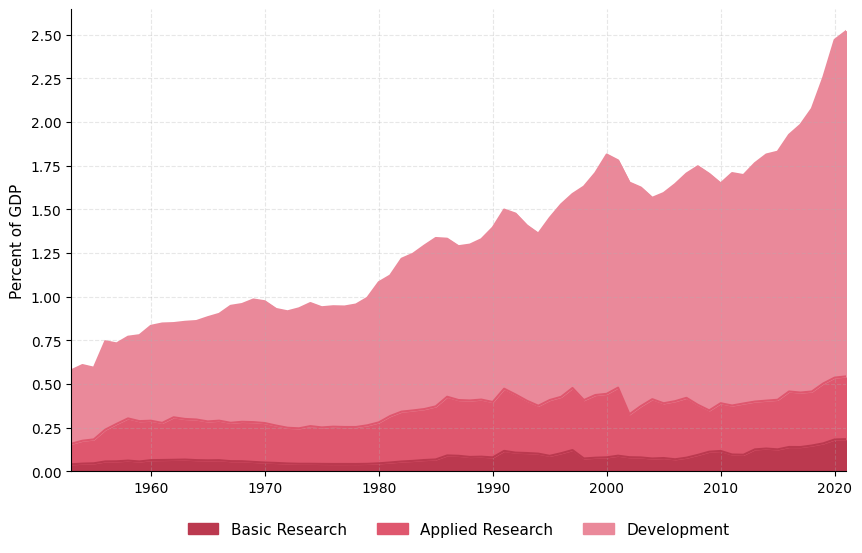

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Define colors for each series
# colors = ['#1f77b4', '#6baed6', '#aec7e8']
colors = ['#BB394F', '#DF576E', '#EA899A']
# Define custom labels for the legend
labels = ['Basic Research', 'Applied Research', 'Development']

# Plot the specified columns as a stacked area plot with custom colors
ax = df[['Business_basic_GDP', 'Business_applied_GDP', 'Business_development_GDP']].plot(
    kind='area',
    stacked=True,
    figsize=(10, 6),
    alpha=1,
    color=colors
)

# Customize the plot
ax.set_xlabel('')
ax.set_ylabel('Percent of GDP', fontsize=11)

# Set custom labels for the legend on the collections (areas)
for collection, label in zip(ax.collections, labels):
    collection.set_label(label)

# Customize the legend
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, frameon=False, fontsize=11)

# Set grid to dashed with alpha=0.5
ax.grid(True, linestyle='--', alpha=0.3)

# Apply alpha to the lines
lines = ax.get_lines()
for line in lines:
    line.set_alpha(1)

# Remove the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis limits
ax.set_xlim(1953, 2021)

plt.yticks(np.arange(0, 2.75, 0.25))

plt.savefig('business_rd.png', dpi=300)
# Show the plot
plt.show()
from google.colab import files
files.download('business_rd.png')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create new columns by summing the relevant columns
df['Federal_GDP'] = df[['Federal_basic_GDP', 'Federal_applied_GDP', 'Federal_development_GDP']].sum(axis=1)
df['Business_GDP'] = df[['Business_basic_GDP', 'Business_applied_GDP', 'Business_development_GDP']].sum(axis=1)
df['Other_GDP'] = df[['Nonfederal_basic_GDP', 'education_basic_GDP', 'NPOs_basic_GDP',
                      'Nonfederal_applied_GDP', 'education_applied_GDP', 'NPOs_applied_GDP',
                      'Nonfederal_development_GDP', 'education_development_GDP', 'NPOs_development_GDP']].sum(axis=1)
df['Total_GDP'] = df[['Federal_GDP', 'Business_GDP', 'Other_GDP']].sum(axis=1)


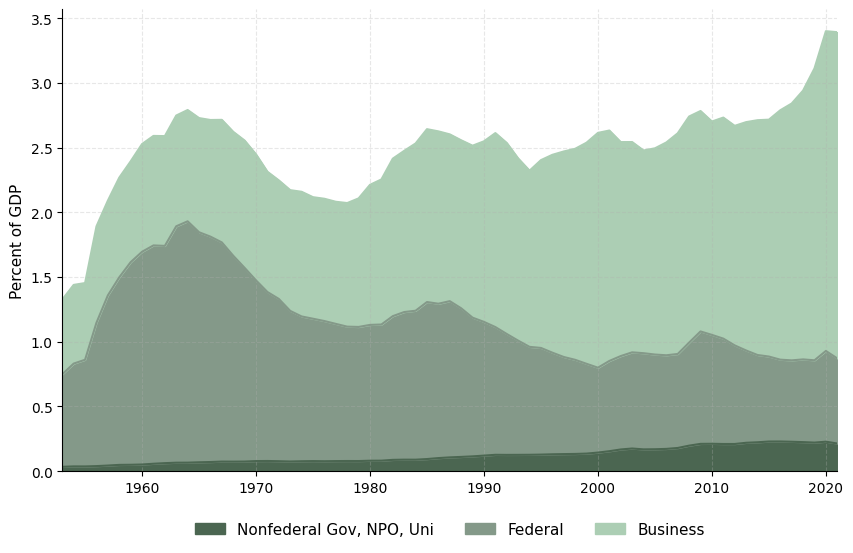

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Define colors for each series
colors = ['#4B6651', '#849989', '#ACCEB4']  # Various shades of red

# Define custom labels for the legend
labels = ['Nonfederal Gov, NPO, Uni', 'Federal', 'Business']

# Plot the specified columns as a stacked area plot with custom colors
ax = df[['Other_GDP', 'Federal_GDP', 'Business_GDP']].plot(
    kind='area',
    stacked=True,
    figsize=(10, 6),
    alpha=1,
    color=colors  # Adding a color for 'Total'
)

# Customize the plot
ax.set_xlabel('')
ax.set_ylabel('Percent of GDP', fontsize=11)

# Set custom labels for the legend on the collections (areas)
for collection, label in zip(ax.collections, labels):
    collection.set_label(label)

# Customize the legend with font size
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, frameon=False, fontsize=11)

# Set grid to dashed with alpha=0.5
ax.grid(True, linestyle='--', alpha=0.3)

# Apply alpha to the lines
lines = ax.get_lines()
for line in lines:
    line.set_alpha(1)

# Remove the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis limits
ax.set_xlim(1953, 2021)

# Set y-axis ticks to every 0.25

# Save the plot to a file with higher DPI for better quality
plt.savefig('total_rd.png', dpi=300)

# Show the plot
plt.show()

# Download the file
from google.colab import files

# Download the plot file
files.download('total_rd.png')


# RD by agancy

In [ ]:
# Install necessary libraries
# !pip install gspread pandas google-auth google-auth-oauthlib google-auth-httplib2

# Authorize and access the Google Sheet
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default

# Authenticate and create the PyDrive client.
auth.authenticate_user()
creds, _ = default()

gc = gspread.authorize(creds)

# Define the Google Sheet URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1C4sBmFe-BDrI9LzOBjn_OyoaxkO8cgo0gww31Km4GbU/edit#gid=613410336'
spreadsheet_id = spreadsheet_url.split('/')[5]

# Open the sheet and select the first worksheet
sheet = gc.open_by_key(spreadsheet_id)
worksheet = sheet.get_worksheet(0)  # Assumes you want the first sheet

# Read data into a pandas DataFrame
rows = worksheet.get_all_values()
df_new = pd.DataFrame(rows[1:], columns=rows[0])  # Assumes first row is the header
df_new.replace(',', '', regex=True, inplace=True)
# Replace 'NA' and other non-numeric entries with NaN
df_new.replace(['NA', 'N/A', 'na', '*'], 0, inplace=True)

# Convert numeric columns to floats
for col in df_new.columns:
    df_new[col] = pd.to_numeric(df_new[col], errors='coerce')

df_new.set_index('Year', inplace=True)

# Display the DataFrame
df_new.tail()


,gdp_nom,Total for all budget functions,National defense (050),International affairs (150),General science and basic research (251),"Space flight, research, and supporting activities (252)",Energy (270),Natural resources and environment (300),Agriculture (350),Commerce and housing credit (370),Transportation (400),Community and regional development (450),"Education, training, employment, and social services (500)",Health (550),Medicare (570),Income security (600),Veterans benefits and services (700),Administration of justice (750),General government (800),Othera
Year,,,,,,,,,,,,,,,,,,,,
2017,19477300,124710,57055,289,9947,10134,3519,2378,2090,901,1444,71,478,34255,21,74,1346,707,0,0
2018,20533100,140701,68325,238,10692,10455,4212,2383,2074,840,1551,144,534,37151,20,106,1286,690,0,0
2019,21381000,145615,71396,235,10961,10016,4433,2486,2205,783,1582,165,517,38755,20,102,1370,590,0,0
2020,21060500,163875,79389,226,11620,14158,4391,2653,2332,858,1674,97,527,43936,20,106,1366,522,0,0
2021,23315100,161412,78609,226,11683,12542,4433,2654,2469,1015,1672,99,733,43199,20,90,1420,548,0,0


In [ ]:
df_new.columns


Index(['gdp_nom', 'Total for all budget functions', 'National defense (050)',
       'International affairs (150)',
       'General science and basic research (251)',
       'Space flight, research, and supporting activities (252)',
       'Energy (270)', 'Natural resources and environment (300)',
       'Agriculture (350)', 'Commerce and housing credit (370)',
       'Transportation (400)', 'Community and regional development (450)',
       'Education, training, employment, and social services (500)',
       'Health (550)', 'Medicare (570)', 'Income security (600)',
       'Veterans benefits and services (700)',
       'Administration of justice (750)', 'General government (800)',
       'Othera'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming df_new is your DataFrame

# Creating the new columns
df_new['Defense'] = df_new['National defense (050)'] * 100 / df_new['gdp_nom']
df_new['NSF'] = df_new['General science and basic research (251)'] * 100 / df_new['gdp_nom']
df_new['Space'] = df_new['Space flight, research, and supporting activities (252)'] * 100 / df_new['gdp_nom']
df_new['Energy'] = df_new['Energy (270)'] * 100 / df_new['gdp_nom']
df_new['Health'] = df_new['Health (550)'] * 100 / df_new['gdp_nom']

# Summing the other specified columns and creating the 'Other' column
df_new['Other'] = (df_new['International affairs (150)'] +
                   df_new['Natural resources and environment (300)'] +
                   df_new['Agriculture (350)'] +
                   df_new['Commerce and housing credit (370)'] +
                   df_new['Transportation (400)'] +
                   df_new['Community and regional development (450)'] +
                   df_new['Education, training, employment, and social services (500)'] +
                   df_new['Medicare (570)'] +
                   df_new['Income security (600)'] +
                   df_new['Veterans benefits and services (700)'] +
                   df_new['Administration of justice (750)'] +
                   df_new['General government (800)'] +
                   df_new['Othera']) * 100 / df_new['gdp_nom']

# Display the updated DataFrame
df_new.head()


,gdp_nom,Total for all budget functions,National defense (050),International affairs (150),General science and basic research (251),"Space flight, research, and supporting activities (252)",Energy (270),Natural resources and environment (300),Agriculture (350),Commerce and housing credit (370),...,Veterans benefits and services (700),Administration of justice (750),General government (800),Othera,Defense,NSF,Space,Energy,Health,Other
Year,,,,,,,,,,,,,,,,,,,,,
1955,425500,2533,2151,0,0,0,0,0,0,0,...,0,0,0,315,0.505523,0.0,0.0,0.0,0.015746,0.074031
1956,449400,2988,2535,0,0,0,0,0,0,0,...,0,0,0,370,0.564085,0.0,0.0,0.0,0.018469,0.082332
1957,474000,3932,3327,0,0,0,0,0,0,0,...,0,0,0,465,0.701899,0.0,0.0,0.0,0.029536,0.098101
1958,481200,4570,3801,0,0,0,0,0,0,0,...,0,0,0,592,0.789900,0.0,0.0,0.0,0.036783,0.123026
1959,521700,6694,5556,0,0,0,0,0,0,0,...,0,0,0,904,1.064980,0.0,0.0,0.0,0.044662,0.173280


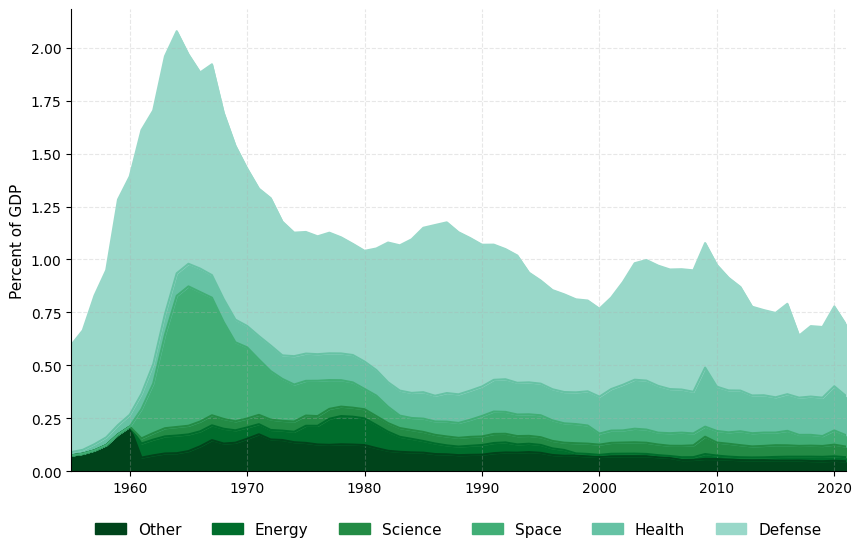

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Define colors for each series
colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a']
colors = ['#00441b', '#006d2c', '#238b45', '#41ae76', '#66c2a4', '#99d8c9']

# Define custom labels for the legend
labels = ['Other', 'Energy', 'Science', 'Space', 'Health', 'Defense']


# Plot the specified columns as a stacked area plot with custom colors
ax = df_new[['Other', 'Energy', 'NSF', 'Space', 'Health', 'Defense' ]].plot(
    kind='area',
    stacked=True,
    figsize=(10, 6),
    alpha=1,
    color=colors  # Adding a color for 'Total'
)

# Customize the plot
ax.set_xlabel('')
ax.set_ylabel('Percent of GDP', fontsize=11)

# Set custom labels for the legend on the collections (areas)
for collection, label in zip(ax.collections, labels):
    collection.set_label(label)

# Customize the legend with font size
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=6, frameon=False, fontsize=11)

# Set grid to dashed with alpha=0.5
ax.grid(True, linestyle='--', alpha=0.3)

# Apply alpha to the lines
lines = ax.get_lines()
for line in lines:
    line.set_alpha(1)

# Remove the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis limits
ax.set_xlim(1955, 2021)

# Set y-axis ticks to every 0.25

# Save the plot to a file with higher DPI for better quality
plt.savefig('agancy_rd.png', dpi=300)

# Show the plot
plt.show()

# Download the file
from google.colab import files

# Download the plot file
files.download('agancy_rd.png')


# by sector gdp

In [ ]:
# Install necessary libraries
# !pip install gspread pandas google-auth google-auth-oauthlib google-auth-httplib2

# Authorize and access the Google Sheet
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default

# Authenticate and create the PyDrive client.
auth.authenticate_user()
creds, _ = default()

gc = gspread.authorize(creds)

# Define the Google Sheet URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/141-KgTtDWTHaw2ItbHJvKMibfNjn_jvkopk9idtqB04/edit#gid=0'
spreadsheet_id = spreadsheet_url.split('/')[5]

# Open the sheet and select the first worksheet
sheet = gc.open_by_key(spreadsheet_id)
worksheet = sheet.get_worksheet(0)  # Assumes you want the first sheet

# Read data into a pandas DataFrame
rows = worksheet.get_all_values()
df_sector = pd.DataFrame(rows[1:], columns=rows[0])  # Assumes first row is the header

In [ ]:
df_sector.tail()

,Year,gdp,Agriculture,Mining,Construction,Manufacturing,Transportation_utilities,Wholesale_trade,Retail_trade,Finance,Services,Government
71,2018,20656516,177117,313494,889075,2261819,997636,1222120,1223550,4258243,4962756,2558752
72,2019,21521395,162043,293865,952767,2267681,1039758,1295923,1277336,4446535,5269320,2632319
73,2020,21322950,160778,201564,951822,2148124,982193,1299923,1335601,4606508,5050472,2710723
74,2021,23594031,225670,332009,1014317,2366452,1162969,1415604,1534920,4972407,5741214,2809207
75,2022,25744108,270820,457438,1090107,2649697,1358713,1546826,1621033,5329881,6333173,2936612


In [ ]:
import pandas as pd

# Assuming df_sector is your DataFrame

# Convert all columns to numeric, errors='coerce' will turn non-convertible values to NaN
df_sector = df_sector.apply(pd.to_numeric, errors='coerce')

# Set Year column as index
df_sector.set_index('Year', inplace=True)

# Create new columns with the suffix '_share' for each column except 'gdp'
for column in df_sector.columns:
    if column != 'gdp':
        df_sector[column + '_share'] = df_sector[column]*100 / df_sector['gdp']

# Calculate the total column as the sum of the specified share columns
share_columns = [
    'Agriculture_share', 'Mining_share', 'Construction_share', 'Manufacturing_share',
    'Transportation_utilities_share', 'Wholesale_trade_share', 'Retail_trade_share',
    'Finance_share', 'Services_share', 'Government_share'
]

# Ensure all share columns are present before summing
for col in share_columns:
    if col not in df_sector.columns:
        df_sector[col] = 0

df_sector['total'] = df_sector[share_columns].sum(axis=1)


# Display the updated DataFrame
df_sector.head()


,gdp,Agriculture,Mining,Construction,Manufacturing,Transportation_utilities,Wholesale_trade,Retail_trade,Finance,Services,...,Mining_share,Construction_share,Manufacturing_share,Transportation_utilities_share,Wholesale_trade_share,Retail_trade_share,Finance_share,Services_share,Government_share,total
Year,,,,,,,,,,,,,,,,,,,,,
1947,244142,19584,6870,9057,65486,20926,16598,28166,24301,20442,...,2.813936,3.709726,26.822915,8.571241,6.798503,11.536729,9.953634,8.372996,12.470202,99.071442
1948,269178,22816,9441,11450,74441,23652,18527,30151,27069,22107,...,3.507345,4.253691,27.654935,8.786751,6.882806,11.201138,10.056171,8.212781,11.148757,100.180550
1949,267284,18338,8159,11449,71961,23947,17833,30420,29242,22756,...,3.052558,4.283459,26.923048,8.959384,6.671929,11.381153,10.940423,8.513791,11.724233,99.310845
1950,293790,19552,9408,13079,83726,26702,20056,31759,32135,24347,...,3.202287,4.451819,28.498587,9.088805,6.826645,10.810102,10.938085,8.287212,10.761769,99.520406
1951,339304,22591,10334,15498,98645,30222,22734,34411,35779,26549,...,3.045646,4.567585,29.072749,8.907057,6.700186,10.141643,10.544821,7.824547,11.471129,98.933405


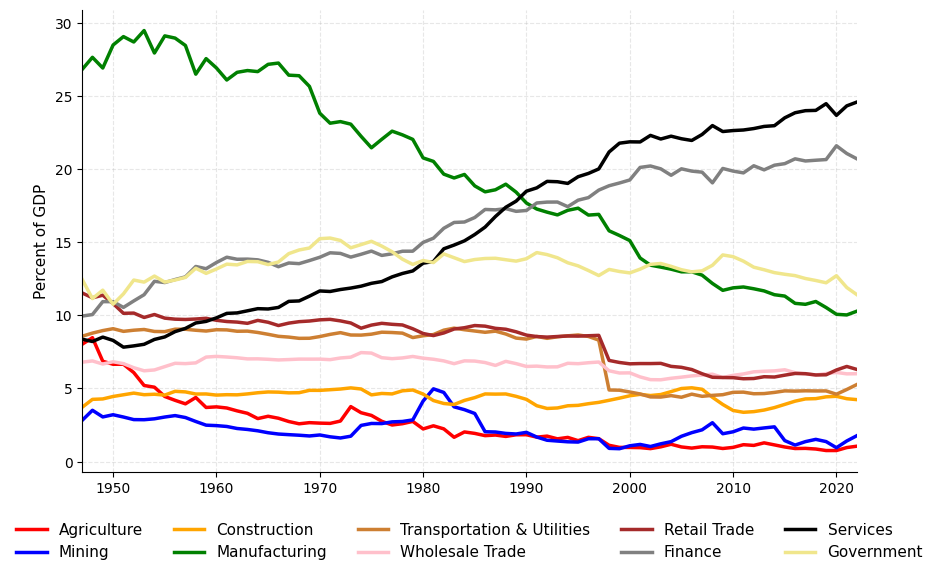

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Define the share columns
share_columns = [
    'Agriculture_share', 'Mining_share', 'Construction_share', 'Manufacturing_share',
    'Transportation_utilities_share', 'Wholesale_trade_share', 'Retail_trade_share',
    'Finance_share', 'Services_share', 'Government_share'
]

# Define colors for each series
colors = ['#FF0000', '#0000FF', '#FFA500', '#008000', '#CD7F32', '#FFC0CB', '#A52A2A', '#808080', '#000000', '#F0E68C']

# Define custom labels for the legend
labels = [
    'Agriculture', 'Mining', 'Construction', 'Manufacturing',
    'Transportation & Utilities', 'Wholesale Trade', 'Retail Trade',
    'Finance', 'Services', 'Government'
]

# Plot the specified columns as a line plot with custom colors and thicker lines
ax = df_sector[share_columns].plot(
    kind='line',
    figsize=(10, 6),
    alpha=1,
    color=colors,
    linewidth=2.5  # Thicker lines
)

# Customize the plot
ax.set_xlabel('', fontsize=11)
ax.set_ylabel('Percent of GDP', fontsize=11)

# Set custom labels for the legend
for line, label in zip(ax.get_lines(), labels):
    line.set_label(label)

# Customize the legend with font size
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=5, frameon=False, fontsize=11)

# Set grid to dashed with alpha=0.5
ax.grid(True, linestyle='--', alpha=0.3)

# Remove the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis limits
ax.set_xlim(df_sector.index.min(), df_sector.index.max())

# Save the plot to a file with higher DPI for better quality
plt.savefig('sector_detail_gdp_share.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Download the file
from google.colab import files

# Download the plot file
files.download('sector_detail_gdp_share.png')


In [ ]:
import matplotlib.pyplot as plt

# Define the columns for the bigger categories
df_sector['Agriculture_Mining_share'] = df_sector['Agriculture_share'] + df_sector['Mining_share']
df_sector['Construction_Manufacturing_share'] = df_sector['Construction_share'] + df_sector['Manufacturing_share']
df_sector['Distribution_Trade_share'] = df_sector['Transportation_utilities_share'] + df_sector['Wholesale_trade_share'] + df_sector['Retail_trade_share']
df_sector['Services_Administration_share'] = df_sector['Finance_share'] + df_sector['Services_share'] + df_sector['Government_share']
df_sector['Services_finance_share'] = df_sector['Finance_share'] + df_sector['Services_share']

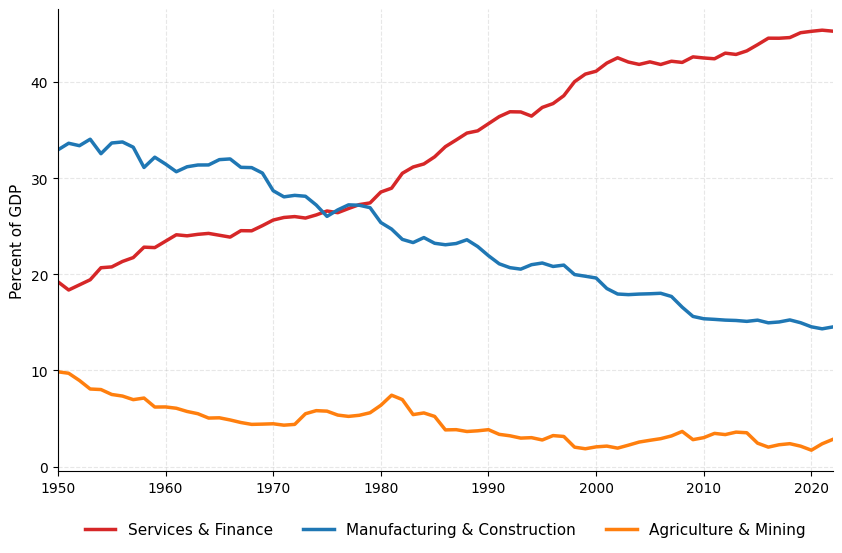

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:


# Define the grouped share columns
grouped_share_columns = [
    'Services_finance_share', 'Construction_Manufacturing_share', 'Agriculture_Mining_share'
]

# Define more distinguishable colors for each series
colors = ['#d62728', '#1f77b4', '#ff7f0e']

# Define custom labels for the legend
labels = [
    'Services & Finance', 'Manufacturing & Construction', 'Agriculture & Mining'
]

# Plot the grouped columns as a line plot with custom colors and thicker lines
ax = df_sector[grouped_share_columns].plot(
    kind='line',
    figsize=(10, 6),
    alpha=1,
    color=colors,
    linewidth=2.5  # Thicker lines
)

# Customize the plot
ax.set_xlabel('', fontsize=11)
ax.set_ylabel('Percent of GDP', fontsize=11)

# Set custom labels for the legend
for line, label in zip(ax.get_lines(), labels):
    line.set_label(label)

# Customize the legend with font size
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, frameon=False, fontsize=11)

# Set grid to dashed with alpha=0.5
ax.grid(True, linestyle='--', alpha=0.3)

# Remove the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis limits
ax.set_xlim(1950, 2022)

# Save the plot to a file with higher DPI for better quality
plt.savefig('sector_gdp_share.png', dpi=300)

# Show the plot
plt.show()

# Download the file
from google.colab import files

# Download the plot file
files.download('sector_gdp_share.png')


# TFP

In [ ]:
# Install necessary libraries
# !pip install gspread pandas google-auth google-auth-oauthlib google-auth-httplib2

# Authorize and access the Google Sheet
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default

# Authenticate and create the PyDrive client.
auth.authenticate_user()
creds, _ = default()

gc = gspread.authorize(creds)

# Define the Google Sheet URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1itgWv4kkUfEE4tgm-gKUnTkXBNX22DqsFFyOfQyCUes/edit#gid=0'
spreadsheet_id = spreadsheet_url.split('/')[5]

# Open the sheet and select the first worksheet
sheet = gc.open_by_key(spreadsheet_id)
worksheet = sheet.get_worksheet(0)  # Assumes you want the first sheet

# Read data into a pandas DataFrame
rows = worksheet.get_all_values()
df_tfp = pd.DataFrame(rows[1:], columns=rows[0])  # Assumes first row is the header

In [ ]:

# Replace commas with periods
df_tfp = df_tfp.replace(',', '.', regex=True)

# Convert to integers
df_tfp = df_tfp.apply(pd.to_numeric)
df_tfp.set_index('date', inplace=True)

df_tfp.head()

,dLP,dtfp_util
date,,
1948,5.04,4.78
1949,1.72,2.41
1950,7.96,2.87
1951,2.69,0.35
1952,3.05,0.88


In [ ]:
import statsmodels.api as sm
# Apply the HP filter with an annual smoothing parameter of 100
hp_filtered = df_tfp.apply(lambda x: sm.tsa.filters.hpfilter(x, lamb=10)[1])
hp_filtered.head()

,dLP,dtfp_util
date,,
1948,4.563482,3.637957
1949,4.348432,3.020155
1950,4.181033,2.516558
1951,3.846095,2.180353
1952,3.506323,2.100074


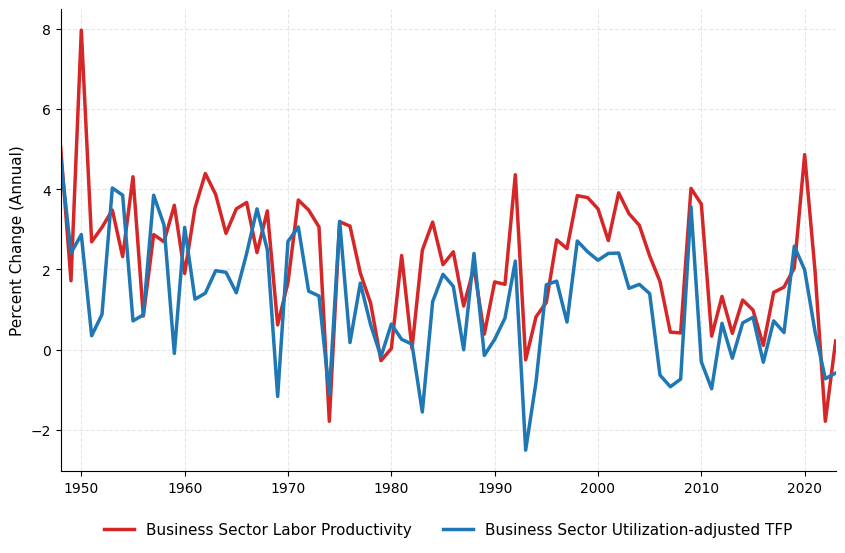

In [ ]:
import matplotlib.pyplot as plt

# Define the grouped share columns
grouped_share_columns = [
    'dLP', 'dtfp_util'
]

# Define more distinguishable colors for each series
colors = ['#d62728', '#1f77b4']

# Define custom labels for the legend
labels = [
    'Business Sector Labor Productivity', 'Business Sector Utilization-adjusted TFP'
]

# Plot the grouped columns as a line plot with custom colors and thicker lines
ax = df_tfp[grouped_share_columns].plot(
    kind='line',
    figsize=(10, 6),
    alpha=1,
    color=colors,
    linewidth=2.5  # Thicker lines
)

# Customize the plot
ax.set_xlabel('', fontsize=11)
ax.set_ylabel('Percent Change (Annual)', fontsize=11)

# Set custom labels for the legend
for line, label in zip(ax.get_lines(), labels):
    line.set_label(label)

# Customize the legend with font size
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=2, frameon=False, fontsize=11)

# Set grid to dashed with alpha=0.5
ax.grid(True, linestyle='--', alpha=0.3)

# Remove the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis limits
ax.set_xlim(1948, 2023)

# Save the plot to a file with higher DPI for better quality
# plt.savefig('sector_gdp_share.png', dpi=300)

# Show the plot
plt.show()

# Download the file
from google.colab import files

# Download the plot file
# files.download('sector_gdp_share.png')


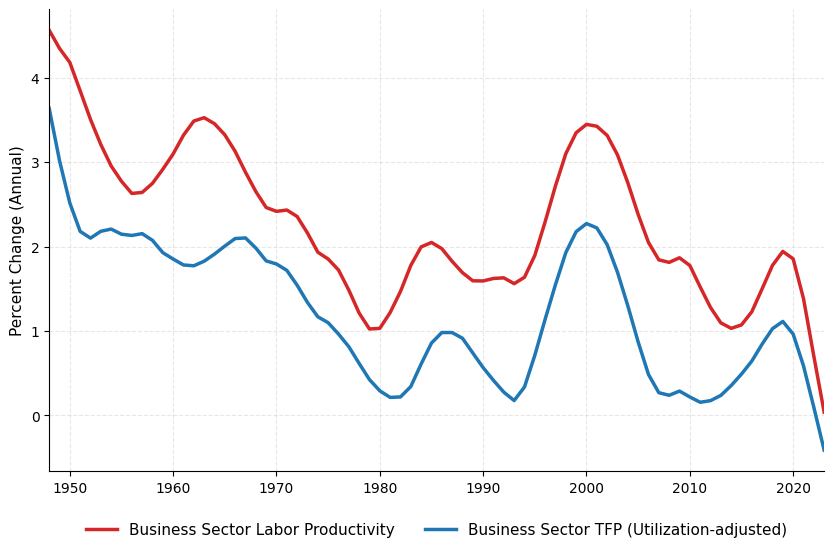

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Define the grouped share columns
grouped_share_columns = [
    'dLP', 'dtfp_util'
]

# Define more distinguishable colors for each series
colors = ['#d62728', '#1f77b4']

# Define custom labels for the legend
labels = [
    'Business Sector Labor Productivity', 'Business Sector TFP (Utilization-adjusted)'
]

# Plot the grouped columns as a line plot with custom colors and thicker lines
ax = hp_filtered[grouped_share_columns].plot(
    kind='line',
    figsize=(10, 6),
    alpha=1,
    color=colors,
    linewidth=2.5  # Thicker lines
)

# Customize the plot
ax.set_xlabel('', fontsize=11)
ax.set_ylabel('Percent Change (Annual)', fontsize=11)

# Set custom labels for the legend
for line, label in zip(ax.get_lines(), labels):
    line.set_label(label)

# Customize the legend with font size
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=2, frameon=False, fontsize=11)

# Set grid to dashed with alpha=0.5
ax.grid(True, linestyle='--', alpha=0.3)

# Remove the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis limits
ax.set_xlim(1948, 2023)

# Save the plot to a file with higher DPI for better quality
plt.savefig('tfp.png', dpi=300)

# Show the plot
plt.show()

# Download the file
from google.colab import files

# Download the plot file
files.download('tfp.png')


# patent plot

In [ ]:
# Install necessary libraries
# !pip install gspread pandas google-auth google-auth-oauthlib google-auth-httplib2

# Authorize and access the Google Sheet
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default

# Authenticate and create the PyDrive client.
auth.authenticate_user()
creds, _ = default()

gc = gspread.authorize(creds)

# Define the Google Sheet URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1rw8rsRNoG8ZkljPJlbSJ3itDOV3sx_HxHSI-jekWbZs/edit#gid=0'
spreadsheet_id = spreadsheet_url.split('/')[5]

# Open the sheet and select the first worksheet
sheet = gc.open_by_key(spreadsheet_id)
worksheet = sheet.get_worksheet(0)  # Assumes you want the first sheet

# Read data into a pandas DataFrame
rows = worksheet.get_all_values()
df_patent = pd.DataFrame(rows[1:], columns=rows[0])  # Assumes first row is the header
df_patent = df_patent.apply(pd.to_numeric)

df_patent.set_index('year', inplace=True)


In [ ]:
df_patent.head()

,total,cited,owned_gov,dod_owned,doe_owned,nasa_owned,nsf_owned,hhs_owned,others_owned
year,,,,,,,,,
1947,18875,388,434,56.666667,5.000000,0.0,0.0,1.000000,371.333333
1948,22505,484,673,88.166667,18.500000,0.0,0.0,3.166667,563.166667
1949,32855,822,909,165.083334,23.333333,0.0,0.0,1.500000,719.083334
1950,39815,952,946,159.416668,62.000000,0.0,0.0,2.000000,722.583334
1951,40724,1059,905,188.000002,45.500000,0.0,0.0,1.000000,670.500001


In [ ]:
df_patent['owned_share'] = df_patent['owned_gov'] * 100 / df_patent['total']
df_patent['cited_share'] = df_patent['cited'] * 100 / df_patent['total']

df_patent['dod_owned_share'] = df_patent['dod_owned'] * 100 / df_patent['total']
df_patent['doe_owned_share'] = df_patent['doe_owned'] * 100 / df_patent['total']
df_patent['nasa_owned_share'] = df_patent['nasa_owned'] * 100 / df_patent['total']
df_patent['nsf_owned_share'] = df_patent['nsf_owned'] * 100 / df_patent['total']
df_patent['hhs_owned_share'] = df_patent['hhs_owned'] * 100 / df_patent['total']
df_patent['others_owned_share'] = df_patent['others_owned'] * 100 / df_patent['total']

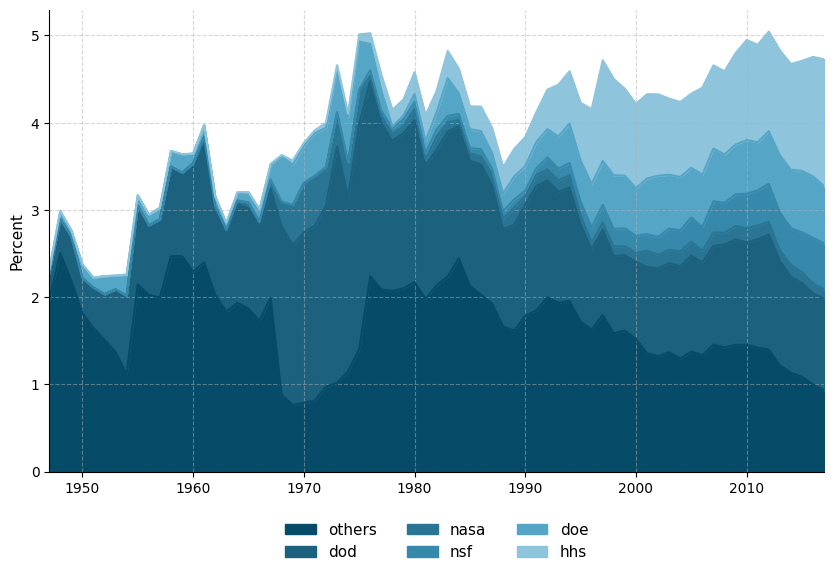

In [ ]:
import matplotlib.pyplot as plt

# Define colors for each series
colors = ['#064B68', '#1C617E', '#2B7594', '#3789AB', '#55A5C6', '#8EC5DC']
# colors = ['#DF576E', '#EA899A']
# Define custom labels for the legend
labels = ['others', 'dod', 'nasa', 'nsf', 'doe', 'hhs']

# Plot the specified columns as a stacked area plot with custom colors
ax = df_patent[['others_owned_share', 'dod_owned_share', 'nasa_owned_share', 'nsf_owned_share', 'doe_owned_share', 'hhs_owned_share']].plot(
    kind='area',
    stacked=True,
    figsize=(10, 6),
    alpha=1,
    color=colors
)

# Customize the plot
ax.set_xlabel('')
ax.set_ylabel('Percent', fontsize=11)

# Set custom labels for the legend on the collections (areas)
for collection, label in zip(ax.collections, labels):
    collection.set_label(label)

# Customize the legend
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, frameon=False, fontsize=11)

# Set grid to dashed with alpha=0.5
ax.grid(True, linestyle='--', alpha=0.5)

# Apply alpha to the lines
lines = ax.get_lines()
for line in lines:
    line.set_alpha(1)

# Remove the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis limits
ax.set_xlim(1947, 2017)
# ax.set_ylim(0, 8)
# plt.savefig('federal_rd.png', dpi=300)
# Show the plot
plt.show()
from google.colab import files
# files.download('federal_rd.png')

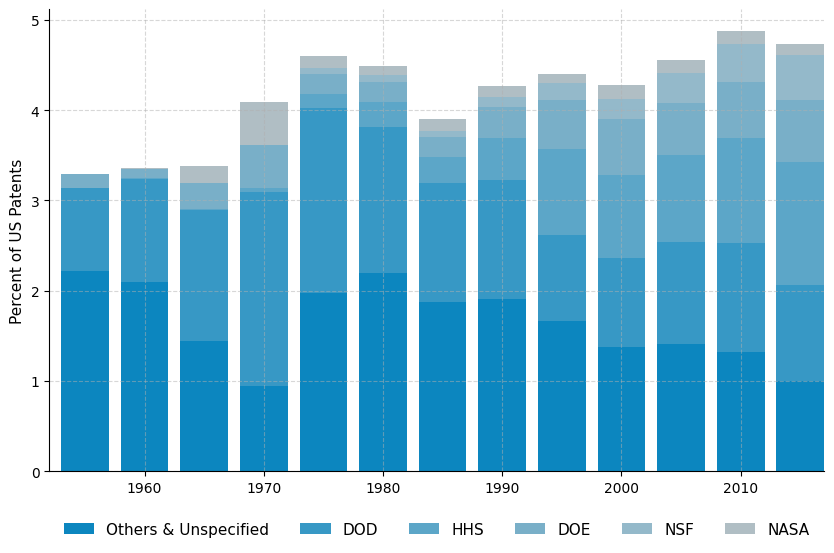

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Group the data into 3-year intervals and calculate the average
df_patent_grouped = df_patent.groupby((df_patent.index // 5) * 5).mean()

colors = ['#0C86BF', '#3798C5', '#5CA6C8', '#79AFC8', '#94B9CA', '#B0BEC4']
# colors = ['#DF576E', '#EA899A']
# Define custom labels for the legend
labels = ['Others & Unspecified', 'DOD', 'HHS', 'DOE', 'NSF', 'NASA']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the data for the stacked bar plot
columns = ['others_owned_share', 'dod_owned_share', 'hhs_owned_share', 'doe_owned_share', 'nsf_owned_share', 'nasa_owned_share']
bottom = pd.Series([0] * len(df_patent_grouped), index=df_patent_grouped.index)

# Plot each series as a stacked bar plot
for column, color, label in zip(columns, colors, labels):
    ax.bar(df_patent_grouped.index, df_patent_grouped[column], bottom=bottom, color=color, label=label, width=4)
    bottom += df_patent_grouped[column]

# Customize the plot
ax.set_xlabel('')
ax.set_ylabel('Percent of US Patents', fontsize=11)

# Customize the legend
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=6, frameon=False, fontsize=11)

# Set grid to dashed with alpha=0.5
ax.grid(True, linestyle='--', alpha=0.5)

# Remove the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis limits
ax.set_xlim(1952, 2017)
plt.savefig('agancy_patents.png', dpi=300)
# Show the plot
plt.show()
files.download('agancy_patents.png')

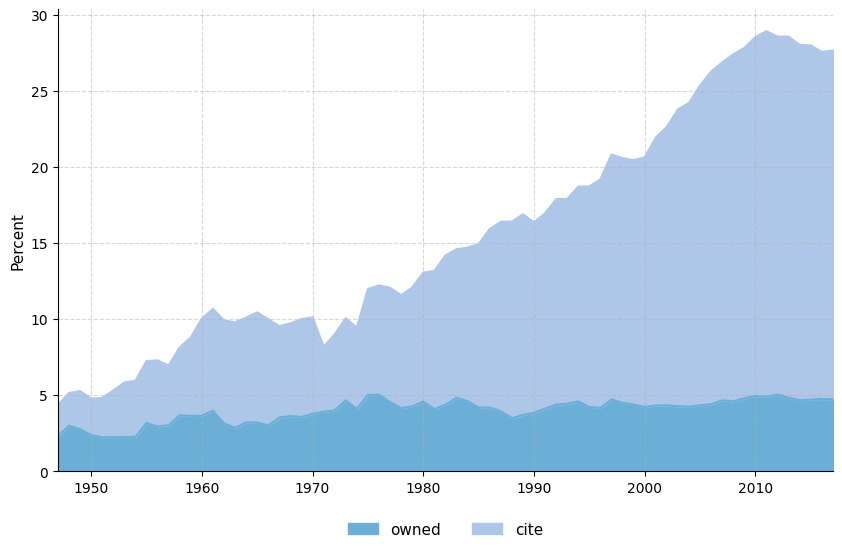

In [ ]:
import matplotlib.pyplot as plt

# Define colors for each series
colors = ['#6baed6', '#aec7e8']
# colors = ['#DF576E', '#EA899A']
# Define custom labels for the legend
labels = ['owned', 'cite']

# Plot the specified columns as a stacked area plot with custom colors
ax = df_patent[['owned_share', 'cited_share']].plot(
    kind='area',
    stacked=True,
    figsize=(10, 6),
    alpha=1,
    color=colors
)

# Customize the plot
ax.set_xlabel('')
ax.set_ylabel('Percent', fontsize=11)

# Set custom labels for the legend on the collections (areas)
for collection, label in zip(ax.collections, labels):
    collection.set_label(label)

# Customize the legend
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, frameon=False, fontsize=11)

# Set grid to dashed with alpha=0.5
ax.grid(True, linestyle='--', alpha=0.5)

# Apply alpha to the lines
lines = ax.get_lines()
for line in lines:
    line.set_alpha(1)

# Remove the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis limits
ax.set_xlim(1947, 2017)
# plt.savefig('federal_rd.png', dpi=300)
# Show the plot
plt.show()
from google.colab import files
# files.download('federal_rd.png')

# appropriation shocks

In [ ]:
# Install necessary libraries
# !pip install gspread pandas google-auth google-auth-oauthlib google-auth-httplib2

# Authorize and access the Google Sheet
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default

# Authenticate and create the PyDrive client.
auth.authenticate_user()
creds, _ = default()

gc = gspread.authorize(creds)

# Define the Google Sheet URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1K3DZqd2gvO8YDXs7Wb7s3--UeC78v9gzj8VxSvvA_c8/edit#gid=0'
spreadsheet_id = spreadsheet_url.split('/')[5]

# Open the sheet and select the first worksheet
sheet = gc.open_by_key(spreadsheet_id)
worksheet = sheet.get_worksheet(0)  # Assumes you want the first sheet

# Read data into a pandas DataFrame
rows = worksheet.get_all_values()
df_approp = pd.DataFrame(rows[1:], columns=rows[0])  # Assumes first row is the header
df_approp = df_approp.apply(pd.to_numeric)

df_approp.set_index('year', inplace=True)


In [ ]:
df_approp.head()

,dod_shock,nasa_shock,hhs_shock,nsf_shock,doe_shock
year,,,,,
1950,2973.98,NaN,47.73,NaN,-69.67
1951,1138.28,NaN,0.00,16.96,899.46
1952,536.27,NaN,0.00,6.18,-196.16
1953,-1312.12,NaN,60.77,16.48,-83.88
1954,-704.34,NaN,49.79,21.24,363.95


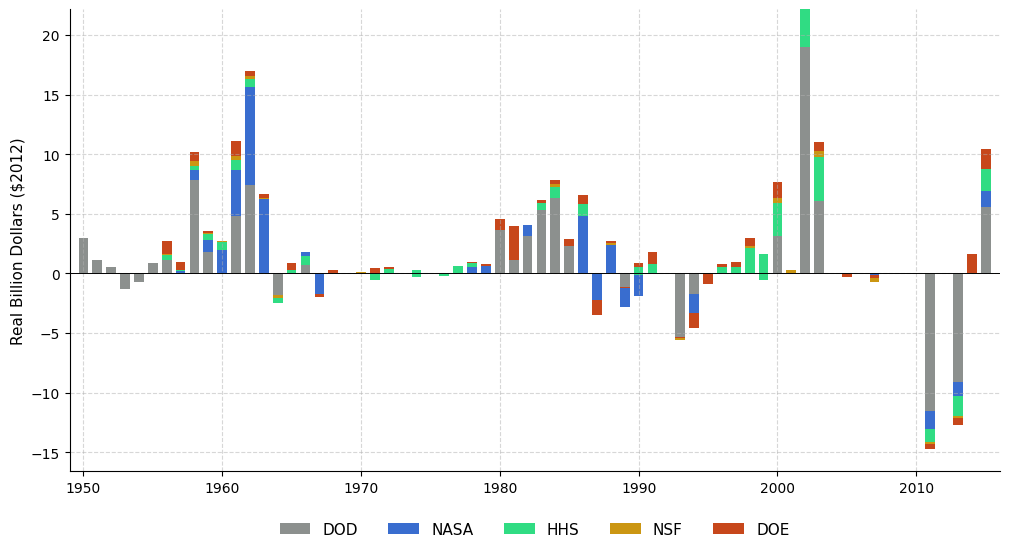

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Group the data into 3-year intervals and calculate the average
df_patent_grouped = df_approp.groupby((df_approp.index // 1) * 1).mean() /1000

colors = ['#8C908E', '#396DCF', '#30DC83', '#CB9612', '#C7471B']
# colors = ['#DF576E', '#EA899A']
# Define custom labels for the legend
labels = ['DOD', 'NASA', 'HHS', 'NSF', 'DOE']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define the data for the stacked bar plot
columns = ['dod_shock', 'nasa_shock', 'hhs_shock', 'nsf_shock', 'doe_shock']
bottom = pd.Series([0] * len(df_patent_grouped), index=df_patent_grouped.index)

# Plot each series as a stacked bar plot
for column, color, label in zip(columns, colors, labels):
    ax.bar(df_patent_grouped.index, df_patent_grouped[column], bottom=bottom, color=color, label=label, width=0.7)
    bottom += df_patent_grouped[column]

ax.axhline(y=0, color='black', linewidth=0.7)

# Customize the plot
ax.set_xlabel('')
ax.set_ylabel('Real Billion Dollars ($2012)', fontsize=11)

# Customize the legend
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=6, frameon=False, fontsize=11)

# Set grid to dashed with alpha=0.5
ax.grid(True, linestyle='--', alpha=0.5)

# Remove the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis limits
ax.set_xlim(1949, 2016)
plt.savefig('agancy_rd_shocks.png', dpi=300)
# Show the plot
plt.show()
files.download('agancy_rd_shocks.png')